# WeatherPy
----

### Analysis
* There are more cities above the equator that experience more humidity.
* There is no strong relationship between Latitude of a City and its Cloudiness.
* There is strong relationship between the Latitude of a city and the Max Temperature the closer the city is to the equator.
* There are several cities above the equator that experience strong winds. 

In [14]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import random

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [15]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    #print(lat_lng[0], lat_lng[1])
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

583

In [17]:
citiesdf = pd.DataFrame({"City": cities, "Country": "",  "Date": "", "Latitude": "", "Longitude": "", 
                         "Max Temperature (F)": "", "Humidity (%)": "", "Cloudiness (%)": "","Wind Speed (mph)": ""})
citiesdf.head()

,City,Country,Date,Latitude,Longitude,Max Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,bengkulu,,,,,,,,
1,am timan,,,,,,,,
2,lebu,,,,,,,,
3,port alfred,,,,,,,,
4,saleaula,,,,,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [18]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
counter = 1

print("Beginning Data Retrival")
for index, row in citiesdf.iterrows():
    target_city = row["City"]
    target_url = url + "&appid=" + api_key + "&units=" + units + "&q=" + target_city.replace(" ","+")   
    response = requests.get(target_url).json()
    time.sleep(1)

    if response["cod"] == "404":
        print("-----------------------------------")
        print("Information for " +(target_city)+ " is missing")
       
    else:
        citiesdf.loc[index, 'City'] = response['name']
        citiesdf.loc[index, 'Country'] = response['sys']['country']
        citiesdf.loc[index, 'Date'] = response['dt']
        citiesdf.loc[index, 'Latitude'] = response['coord']['lat']
        citiesdf.loc[index, 'Longitude'] = response['coord']['lon']
        citiesdf.loc[index, 'Max Temperature (F)'] = response['main']['temp_max']
        citiesdf.loc[index, 'Humidity (%)'] = response['main']['humidity']
        citiesdf.loc[index, 'Cloudiness (%)'] = response['clouds']['all']
        citiesdf.loc[index, 'Wind Speed (mph)'] = response['wind']['speed']
     
        print("-----------------------------------")
        print("Processing: City # "+str(counter))
        print("The City name is "+(response['name']))
        print(target_url)
        counter +=1
        
print("Data Retrival Complete")        

Beginning Data Retrival
-----------------------------------
Information for bengkulu is missing
-----------------------------------
Processing: City # 1
The City name is Am Timan
http://api.openweathermap.org/data/2.5/weather?&appid=4c2a1a58c6a7504efff4a2152885b1dd&units=imperial&q=am+timan
-----------------------------------
Processing: City # 2
The City name is Lebu
http://api.openweathermap.org/data/2.5/weather?&appid=4c2a1a58c6a7504efff4a2152885b1dd&units=imperial&q=lebu
-----------------------------------
Processing: City # 3
The City name is Port Alfred
http://api.openweathermap.org/data/2.5/weather?&appid=4c2a1a58c6a7504efff4a2152885b1dd&units=imperial&q=port+alfred
-----------------------------------
Information for saleaula is missing
-----------------------------------
Processing: City # 4
The City name is Puerto Ayora
http://api.openweathermap.org/data/2.5/weather?&appid=4c2a1a58c6a7504efff4a2152885b1dd&units=imperial&q=puerto+ayora
-----------------------------------
Proces

-----------------------------------
Processing: City # 41
The City name is New Norfolk
http://api.openweathermap.org/data/2.5/weather?&appid=4c2a1a58c6a7504efff4a2152885b1dd&units=imperial&q=new+norfolk
-----------------------------------
Processing: City # 42
The City name is Carlyle
http://api.openweathermap.org/data/2.5/weather?&appid=4c2a1a58c6a7504efff4a2152885b1dd&units=imperial&q=carlyle
-----------------------------------
Processing: City # 43
The City name is Hasaki
http://api.openweathermap.org/data/2.5/weather?&appid=4c2a1a58c6a7504efff4a2152885b1dd&units=imperial&q=hasaki
-----------------------------------
Processing: City # 44
The City name is East London
http://api.openweathermap.org/data/2.5/weather?&appid=4c2a1a58c6a7504efff4a2152885b1dd&units=imperial&q=east+london
-----------------------------------
Processing: City # 45
The City name is Geraldton
http://api.openweathermap.org/data/2.5/weather?&appid=4c2a1a58c6a7504efff4a2152885b1dd&units=imperial&q=geraldton
-------

-----------------------------------
Processing: City # 83
The City name is Kruisfontein
http://api.openweathermap.org/data/2.5/weather?&appid=4c2a1a58c6a7504efff4a2152885b1dd&units=imperial&q=kruisfontein
-----------------------------------
Information for amderma is missing
-----------------------------------
Processing: City # 84
The City name is Northam
http://api.openweathermap.org/data/2.5/weather?&appid=4c2a1a58c6a7504efff4a2152885b1dd&units=imperial&q=northam
-----------------------------------
Processing: City # 85
The City name is Iqaluit
http://api.openweathermap.org/data/2.5/weather?&appid=4c2a1a58c6a7504efff4a2152885b1dd&units=imperial&q=iqaluit
-----------------------------------
Processing: City # 86
The City name is Hamilton
http://api.openweathermap.org/data/2.5/weather?&appid=4c2a1a58c6a7504efff4a2152885b1dd&units=imperial&q=hamilton
-----------------------------------
Processing: City # 87
The City name is Carballo
http://api.openweathermap.org/data/2.5/weather?&appid

-----------------------------------
Processing: City # 123
The City name is Port Lincoln
http://api.openweathermap.org/data/2.5/weather?&appid=4c2a1a58c6a7504efff4a2152885b1dd&units=imperial&q=port+lincoln
-----------------------------------
Processing: City # 124
The City name is Poum
http://api.openweathermap.org/data/2.5/weather?&appid=4c2a1a58c6a7504efff4a2152885b1dd&units=imperial&q=poum
-----------------------------------
Processing: City # 125
The City name is Yumen
http://api.openweathermap.org/data/2.5/weather?&appid=4c2a1a58c6a7504efff4a2152885b1dd&units=imperial&q=yumen
-----------------------------------
Processing: City # 126
The City name is Mar del Plata
http://api.openweathermap.org/data/2.5/weather?&appid=4c2a1a58c6a7504efff4a2152885b1dd&units=imperial&q=mar+del+plata
-----------------------------------
Processing: City # 127
The City name is Morondava
http://api.openweathermap.org/data/2.5/weather?&appid=4c2a1a58c6a7504efff4a2152885b1dd&units=imperial&q=morondava
----

-----------------------------------
Processing: City # 165
The City name is Colares
http://api.openweathermap.org/data/2.5/weather?&appid=4c2a1a58c6a7504efff4a2152885b1dd&units=imperial&q=colares
-----------------------------------
Processing: City # 166
The City name is Coquimbo
http://api.openweathermap.org/data/2.5/weather?&appid=4c2a1a58c6a7504efff4a2152885b1dd&units=imperial&q=coquimbo
-----------------------------------
Processing: City # 167
The City name is Tasiilaq
http://api.openweathermap.org/data/2.5/weather?&appid=4c2a1a58c6a7504efff4a2152885b1dd&units=imperial&q=tasiilaq
-----------------------------------
Information for asau is missing
-----------------------------------
Processing: City # 168
The City name is Grindavik
http://api.openweathermap.org/data/2.5/weather?&appid=4c2a1a58c6a7504efff4a2152885b1dd&units=imperial&q=grindavik
-----------------------------------
Processing: City # 169
The City name is Harper
http://api.openweathermap.org/data/2.5/weather?&appid=4c2

-----------------------------------
Information for zolotinka is missing
-----------------------------------
Processing: City # 204
The City name is Aswan
http://api.openweathermap.org/data/2.5/weather?&appid=4c2a1a58c6a7504efff4a2152885b1dd&units=imperial&q=aswan
-----------------------------------
Processing: City # 205
The City name is Coolum Beach
http://api.openweathermap.org/data/2.5/weather?&appid=4c2a1a58c6a7504efff4a2152885b1dd&units=imperial&q=coolum+beach
-----------------------------------
Processing: City # 206
The City name is Udachnyy
http://api.openweathermap.org/data/2.5/weather?&appid=4c2a1a58c6a7504efff4a2152885b1dd&units=imperial&q=udachnyy
-----------------------------------
Processing: City # 207
The City name is Smoky Lake
http://api.openweathermap.org/data/2.5/weather?&appid=4c2a1a58c6a7504efff4a2152885b1dd&units=imperial&q=smoky+lake
-----------------------------------
Processing: City # 208
The City name is Airai
http://api.openweathermap.org/data/2.5/weather?

-----------------------------------
Processing: City # 243
The City name is Derzhavinsk
http://api.openweathermap.org/data/2.5/weather?&appid=4c2a1a58c6a7504efff4a2152885b1dd&units=imperial&q=derzhavinsk
-----------------------------------
Processing: City # 244
The City name is Keetmanshoop
http://api.openweathermap.org/data/2.5/weather?&appid=4c2a1a58c6a7504efff4a2152885b1dd&units=imperial&q=keetmanshoop
-----------------------------------
Processing: City # 245
The City name is Baie-Comeau
http://api.openweathermap.org/data/2.5/weather?&appid=4c2a1a58c6a7504efff4a2152885b1dd&units=imperial&q=baie-comeau
-----------------------------------
Processing: City # 246
The City name is Oranjemund
http://api.openweathermap.org/data/2.5/weather?&appid=4c2a1a58c6a7504efff4a2152885b1dd&units=imperial&q=oranjemund
-----------------------------------
Processing: City # 247
The City name is Coihaique
http://api.openweathermap.org/data/2.5/weather?&appid=4c2a1a58c6a7504efff4a2152885b1dd&units=imper

-----------------------------------
Information for akyab is missing
-----------------------------------
Processing: City # 283
The City name is Bathsheba
http://api.openweathermap.org/data/2.5/weather?&appid=4c2a1a58c6a7504efff4a2152885b1dd&units=imperial&q=bathsheba
-----------------------------------
Information for tabiauea is missing
-----------------------------------
Information for chagda is missing
-----------------------------------
Processing: City # 284
The City name is Hawkesbury
http://api.openweathermap.org/data/2.5/weather?&appid=4c2a1a58c6a7504efff4a2152885b1dd&units=imperial&q=hawkesbury
-----------------------------------
Processing: City # 285
The City name is Moron
http://api.openweathermap.org/data/2.5/weather?&appid=4c2a1a58c6a7504efff4a2152885b1dd&units=imperial&q=moron
-----------------------------------
Processing: City # 286
The City name is Dhadar
http://api.openweathermap.org/data/2.5/weather?&appid=4c2a1a58c6a7504efff4a2152885b1dd&units=imperial&q=dhadar
-

-----------------------------------
Processing: City # 322
The City name is Chuy
http://api.openweathermap.org/data/2.5/weather?&appid=4c2a1a58c6a7504efff4a2152885b1dd&units=imperial&q=chuy
-----------------------------------
Processing: City # 323
The City name is Bandarbeyla
http://api.openweathermap.org/data/2.5/weather?&appid=4c2a1a58c6a7504efff4a2152885b1dd&units=imperial&q=bandarbeyla
-----------------------------------
Processing: City # 324
The City name is Provideniya
http://api.openweathermap.org/data/2.5/weather?&appid=4c2a1a58c6a7504efff4a2152885b1dd&units=imperial&q=provideniya
-----------------------------------
Processing: City # 325
The City name is Salalah
http://api.openweathermap.org/data/2.5/weather?&appid=4c2a1a58c6a7504efff4a2152885b1dd&units=imperial&q=salalah
-----------------------------------
Processing: City # 326
The City name is Quatre Cocos
http://api.openweathermap.org/data/2.5/weather?&appid=4c2a1a58c6a7504efff4a2152885b1dd&units=imperial&q=quatre+cocos


-----------------------------------
Processing: City # 363
The City name is Paamiut
http://api.openweathermap.org/data/2.5/weather?&appid=4c2a1a58c6a7504efff4a2152885b1dd&units=imperial&q=paamiut
-----------------------------------
Processing: City # 364
The City name is Symington
http://api.openweathermap.org/data/2.5/weather?&appid=4c2a1a58c6a7504efff4a2152885b1dd&units=imperial&q=symington
-----------------------------------
Processing: City # 365
The City name is Sangar
http://api.openweathermap.org/data/2.5/weather?&appid=4c2a1a58c6a7504efff4a2152885b1dd&units=imperial&q=sangar
-----------------------------------
Processing: City # 366
The City name is Guanica
http://api.openweathermap.org/data/2.5/weather?&appid=4c2a1a58c6a7504efff4a2152885b1dd&units=imperial&q=guanica
-----------------------------------
Processing: City # 367
The City name is Anuppur
http://api.openweathermap.org/data/2.5/weather?&appid=4c2a1a58c6a7504efff4a2152885b1dd&units=imperial&q=anuppur
------------------

-----------------------------------
Processing: City # 404
The City name is Nelson
http://api.openweathermap.org/data/2.5/weather?&appid=4c2a1a58c6a7504efff4a2152885b1dd&units=imperial&q=nelson
-----------------------------------
Processing: City # 405
The City name is Touho
http://api.openweathermap.org/data/2.5/weather?&appid=4c2a1a58c6a7504efff4a2152885b1dd&units=imperial&q=touho
-----------------------------------
Processing: City # 406
The City name is Aksu
http://api.openweathermap.org/data/2.5/weather?&appid=4c2a1a58c6a7504efff4a2152885b1dd&units=imperial&q=aksu
-----------------------------------
Processing: City # 407
The City name is Eldorado
http://api.openweathermap.org/data/2.5/weather?&appid=4c2a1a58c6a7504efff4a2152885b1dd&units=imperial&q=eldorado
-----------------------------------
Processing: City # 408
The City name is Urengoy
http://api.openweathermap.org/data/2.5/weather?&appid=4c2a1a58c6a7504efff4a2152885b1dd&units=imperial&q=urengoy
------------------------------

-----------------------------------
Information for tumannyy is missing
-----------------------------------
Processing: City # 445
The City name is Katherine
http://api.openweathermap.org/data/2.5/weather?&appid=4c2a1a58c6a7504efff4a2152885b1dd&units=imperial&q=katherine
-----------------------------------
Processing: City # 446
The City name is Port Hardy
http://api.openweathermap.org/data/2.5/weather?&appid=4c2a1a58c6a7504efff4a2152885b1dd&units=imperial&q=port+hardy
-----------------------------------
Processing: City # 447
The City name is Junnar
http://api.openweathermap.org/data/2.5/weather?&appid=4c2a1a58c6a7504efff4a2152885b1dd&units=imperial&q=junnar
-----------------------------------
Processing: City # 448
The City name is Dauphin
http://api.openweathermap.org/data/2.5/weather?&appid=4c2a1a58c6a7504efff4a2152885b1dd&units=imperial&q=dauphin
-----------------------------------
Processing: City # 449
The City name is Kibakwe
http://api.openweathermap.org/data/2.5/weather?&appi

-----------------------------------
Processing: City # 485
The City name is Sarahan
http://api.openweathermap.org/data/2.5/weather?&appid=4c2a1a58c6a7504efff4a2152885b1dd&units=imperial&q=sarahan
-----------------------------------
Information for potgietersrus is missing
-----------------------------------
Processing: City # 486
The City name is Saint-Georges
http://api.openweathermap.org/data/2.5/weather?&appid=4c2a1a58c6a7504efff4a2152885b1dd&units=imperial&q=saint-georges
-----------------------------------
Processing: City # 487
The City name is Healdsburg
http://api.openweathermap.org/data/2.5/weather?&appid=4c2a1a58c6a7504efff4a2152885b1dd&units=imperial&q=healdsburg
-----------------------------------
Processing: City # 488
The City name is Novikovo
http://api.openweathermap.org/data/2.5/weather?&appid=4c2a1a58c6a7504efff4a2152885b1dd&units=imperial&q=novikovo
-----------------------------------
Processing: City # 489
The City name is Ojinaga
http://api.openweathermap.org/data/

In [19]:
citiesdf.count()

City                   583
Country                583
Date                   583
Latitude               583
Longitude              583
Max Temperature (F)    583
Humidity (%)           583
Cloudiness (%)         583
Wind Speed (mph)       583
dtype: int64

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [23]:
citiesdf.to_csv("WeatherPy_City_analysis.csv", index=False)
citiesdf = pd.read_csv("WeatherPy_City_analysis.csv")

In [25]:
#Drop blank cells
citiesdf.dropna(inplace=True)
citiesdf.head()

,City,Country,Date,Latitude,Longitude,Max Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
1,Am Timan,TD,1.541292e+09,11.04,20.28,70.17,74.0,0.0,3.09
2,Lebu,ET,1.541286e+09,8.96,38.73,60.80,55.0,75.0,6.93
3,Port Alfred,ZA,1.541292e+09,-33.59,26.89,71.66,68.0,8.0,19.15
5,Puerto Ayora,EC,1.541290e+09,-0.74,-90.35,77.00,69.0,75.0,9.17
6,Hermanus,ZA,1.541292e+09,-34.42,19.24,59.64,67.0,88.0,4.21


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

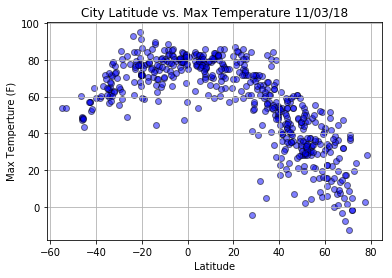

In [26]:
# Build the scatter plots 
plt.scatter(citiesdf['Latitude'], citiesdf['Max Temperature (F)'], linewidth=1, marker="o", 
            alpha=0.5, facecolor="blue", edgecolor="black", label="City")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature {time.strftime('%m/%d/%y')}")
plt.xlabel("Latitude")
plt.ylabel("Max Temperture (F)")
plt.grid(True)

plt.savefig("Latitude_Temperature.png")
plt.show()

#### Latitude vs. Humidity Plot

In [27]:
citiesdf=citiesdf[(citiesdf['Humidity (%)']<=100)]

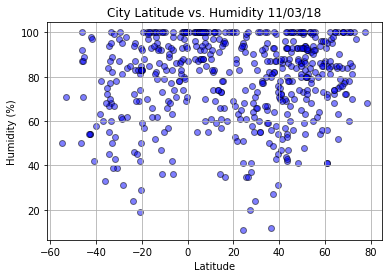

In [32]:
# Build the scatter plots 
plt.scatter(citiesdf['Latitude'], citiesdf['Humidity (%)'], linewidth=1, marker="o", 
            alpha=0.5, facecolor="blue", edgecolor="black", label="City")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity {time.strftime('%m/%d/%y')}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

plt.savefig("Latitude_Humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

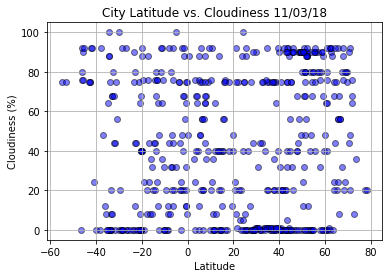

In [29]:
# Build the scatter plots 
plt.scatter(citiesdf['Latitude'], citiesdf['Cloudiness (%)'], linewidth=1, marker="o", 
            alpha=0.5, facecolor="blue", edgecolor="black", label="City")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness {time.strftime('%m/%d/%y')}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

plt.savefig("Latitude_Cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

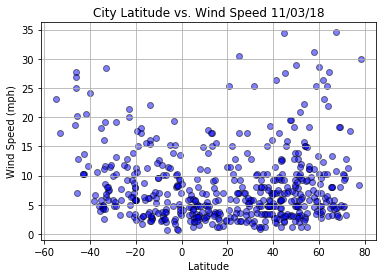

In [30]:
# Build the scatter plots 
plt.scatter(citiesdf['Latitude'], citiesdf['Wind Speed (mph)'], linewidth=1, marker="o", 
            alpha=0.5, facecolor="blue", edgecolor="black", label="City")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed {time.strftime('%m/%d/%y')}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

plt.savefig("Latitude_WindSpeed.png")
plt.show()